In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('front_face.csv')  

In [129]:
df.head()

,id,height,weight,bmi-gt,class-gt,CJWR,WHR,PAR,ES,FWR,MEH,CFR,CFR-HZJ,CFR-NSJ,CFR-FHH,CFR-FHN
0,290079.jpg,1.65,97.52,35.82,d,1.192381,1.637814,0.020299,44.497728,1.377794,36.341513,0.432000,0.002400,0.002285,0.453731,0.411310
1,290167.jpg,1.57,68.04,27.60,c,1.224823,1.508974,0.023071,36.498993,1.232179,29.258188,0.419558,0.002497,0.002397,0.437032,0.402783
2,290173.jpg,1.63,62.14,23.39,b,1.237006,1.570872,0.028059,32.514632,1.301471,24.350046,0.345656,0.002542,0.002468,0.355904,0.335703
3,290248.jpg,1.75,72.57,23.70,b,1.198098,1.784604,0.019111,42.022874,1.233747,29.297992,0.385503,0.001918,0.002029,0.364339,0.407897
4,290250.jpg,1.88,94.35,26.69,c,1.233527,1.655420,0.020102,43.001689,1.278961,25.918256,0.405577,0.002134,0.002157,0.401264,0.409937


Ref. https://depart.femh.org.tw/dietary/3OPD/BMI.htm
a: BMI＜18.5
b: 18.5≦BMI＜24
c: 24≦BMI＜27
d: 27≦BMI＜30
e: 30≦BMI＜35
f: BMI≧35

In [151]:
df['class-6'] = ''

In [152]:
df['class-6'][df['bmi-gt'] < 18.5] = 0
df['class-6'][df['bmi-gt'].between(18.5, 24)] = 1
df['class-6'][df['bmi-gt'].between(24, 27)] = 2
df['class-6'][df['bmi-gt'].between(27, 30)] = 3
df['class-6'][df['bmi-gt'].between(30, 35)] = 4
df['class-6'][df['bmi-gt'] > 35] = 5
df['class-6'] = df['class-6'].astype('int8')
df.dtypes

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\pyth

id           object
height      float64
weight      float64
bmi-gt      float64
class-gt     object
CJWR        float64
WHR         float64
PAR         float64
ES          float64
FWR         float64
MEH         float64
CFR         float64
CFR-HZJ     float64
CFR-NSJ     float64
CFR-FHH     float64
CFR-FHN     float64
class-6        int8
dtype: object

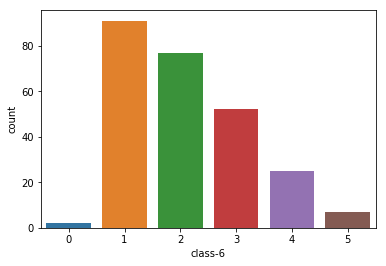

In [153]:
sns.countplot('class-6',data=df[['class-6']])

In [154]:
class0Data = df[df['class-6'] == 0]
class3Data = df[df['class-6'] == 3]
class4Data = df[df['class-6'] == 4]
class5Data = df[df['class-6'] == 5]

In [155]:
newdf = df.append([class0Data]*40,ignore_index=True)
newdf = newdf.append([class3Data]*1,ignore_index=True)
newdf = newdf.append([class4Data]*2,ignore_index=True)
newdf = newdf.append([class5Data]*10,ignore_index=True)
newdf

,id,height,weight,bmi-gt,class-gt,CJWR,WHR,PAR,ES,FWR,MEH,CFR,CFR-HZJ,CFR-NSJ,CFR-FHH,CFR-FHN,class-6
0,290079.jpg,1.65,97.52,35.82,d,1.192381,1.637814,0.020299,44.497728,1.377794,36.341513,0.432000,0.002400,0.002285,0.453731,0.411310,5
1,290167.jpg,1.57,68.04,27.60,c,1.224823,1.508974,0.023071,36.498993,1.232179,29.258188,0.419558,0.002497,0.002397,0.437032,0.402783,3
2,290173.jpg,1.63,62.14,23.39,b,1.237006,1.570872,0.028059,32.514632,1.301471,24.350046,0.345656,0.002542,0.002468,0.355904,0.335703,1
3,290248.jpg,1.75,72.57,23.70,b,1.198098,1.784604,0.019111,42.022874,1.233747,29.297992,0.385503,0.001918,0.002029,0.364339,0.407897,1
4,290250.jpg,1.88,94.35,26.69,c,1.233527,1.655420,0.020102,43.001689,1.278961,25.918256,0.405577,0.002134,0.002157,0.401264,0.409937,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,293221.jpg,1.78,129.27,40.80,d,1.156078,1.788453,0.019551,42.001724,1.514333,29.215481,0.460737,0.002632,0.002531,0.479212,0.442975,5
502,294153.jpg,1.78,117.93,37.22,d,1.186121,1.638275,0.024344,33.502174,1.211473,27.366538,0.396775,0.002542,0.002558,0.394235,0.399331,5
503,294917.jpg,1.88,142.88,40.43,d,1.175724,1.521048,0.019517,44.997767,1.387978,30.858827,0.461651,0.002523,0.002274,0.512130,0.416148,5
504,295948.jpg,1.70,111.13,38.45,d,1.176879,1.628805,0.019399,43.986691,1.367659,34.198932,0.429845,0.002323,0.002216,0.450731,0.409928,5


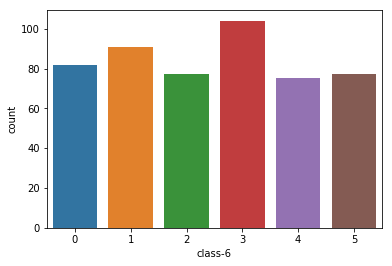

In [156]:
sns.countplot('class-6',data=newdf[['class-6']])

In [157]:
X = newdf[['CJWR', 'WHR', 'PAR', 'ES', 'FWR', 'MEH', 'CFR', 'CFR-HZJ', 'CFR-NSJ', 'CFR-FHH', 'CFR-FHN']]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [158]:
finalDf = pd.concat([principalDf, newdf[['class-6']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class-6
0,9.911989,1.091862,5
1,-0.753845,1.731373,3
2,-7.040821,1.071808,1
3,3.183978,-2.145593,1
4,1.488852,-5.227722,2


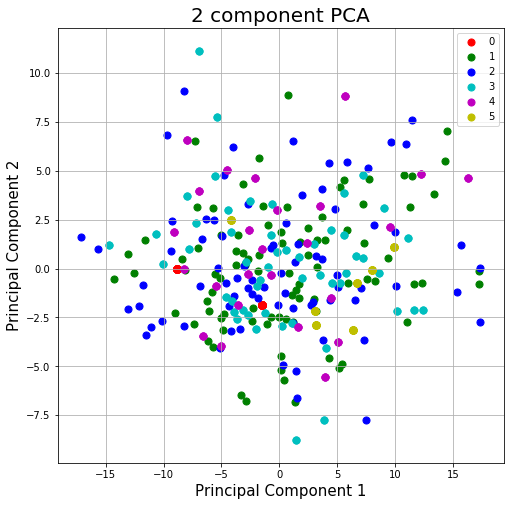

In [159]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5]
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class-6'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [160]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [161]:
corrBMI = newdf[['bmi-gt', 'CJWR', 'WHR', 'PAR', 'ES', 'FWR', 'MEH', 'CFR', 'CFR-HZJ', 'CFR-NSJ', 'CFR-FHH', 'CFR-FHN']]
corrBMI.corr()

,bmi-gt,CJWR,WHR,PAR,ES,FWR,MEH,CFR,CFR-HZJ,CFR-NSJ,CFR-FHH,CFR-FHN
bmi-gt,1.000000,-0.130262,0.005940,-0.315105,0.286593,0.355969,0.319473,0.339309,0.009032,-0.068920,0.311475,0.286841
CJWR,-0.130262,1.000000,-0.033360,0.005386,0.164934,-0.004208,0.062193,-0.469583,-0.293641,-0.226350,-0.438733,-0.377574
WHR,0.005940,-0.033360,1.000000,-0.106406,0.194762,0.270296,-0.007847,-0.296246,-0.186099,0.049496,-0.501993,0.230582
PAR,-0.315105,0.005386,-0.106406,1.000000,-0.897335,-0.121485,-0.649759,-0.146564,0.754278,0.836679,-0.072929,-0.237410
ES,0.286593,0.164934,0.194762,-0.897335,1.000000,0.269519,0.664289,0.001774,-0.713185,-0.772958,-0.043792,0.082869
FWR,0.355969,-0.004208,0.270296,-0.121485,0.269519,1.000000,0.202981,0.417842,0.343284,0.255549,0.418566,0.270339
MEH,0.319473,0.062193,-0.007847,-0.649759,0.664289,0.202981,1.000000,0.031951,-0.490117,-0.586765,0.056995,-0.041024
CFR,0.339309,-0.469583,-0.296246,-0.146564,0.001774,0.417842,0.031951,1.000000,0.494929,0.307984,0.950377,0.765823
CFR-HZJ,0.009032,-0.293641,-0.186099,0.754278,-0.713185,0.343284,-0.490117,0.494929,1.000000,0.947612,0.537370,0.251301
CFR-NSJ,-0.068920,-0.226350,0.049496,0.836679,-0.772958,0.255549,-0.586765,0.307984,0.947612,1.000000,0.286143,0.260955


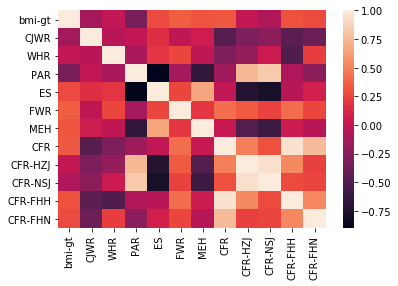

In [162]:
ax = sns.heatmap(corrBMI.corr())

In [163]:
X = newdf[['PAR', 'ES', 'FWR', 'MEH', 'CFR', 'CFR-FHH', 'CFR-FHN']]
y = newdf['class-6']
yBMI = newdf['bmi-gt']

In [164]:
param_grid = {'C': [1, 10, 100, 1000],  
              'gamma': [1, 10, 100],
              'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.723, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.673, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.673, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.683, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.843, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=1, gamma=10, kernel=rbf, score=0.832, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.832, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.853, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.851, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.842, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.842, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.851, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 10, 100],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [165]:
print(grid.best_params_)

{'C': 1, 'gamma': 100, 'kernel': 'rbf'}


In [166]:
import random
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(0,99))
x_trainBMI, x_testBMI, y_trainBMI, y_testBMI = train_test_split(X, yBMI, test_size=0.2, random_state=random.randint(0,99))

In [167]:
clf = svm.SVC(C=1, gamma=100, kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [168]:
test_y_predicted = clf.predict(x_test)

In [169]:
from sklearn.metrics import confusion_matrix, classification_report

In [170]:
accuracy = metrics.accuracy_score(y_test, test_y_predicted)
accuracy

0.8431372549019608

In [171]:
cnf_matrix = confusion_matrix(y_test, test_y_predicted)
print(cnf_matrix)

[[16  0  0  0  0  0]
 [ 0 20  1  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  6  0 21  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 19]]


In [172]:
report_matrix = classification_report(y_test, test_y_predicted)
print(report_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.57      0.95      0.71        21
           2       0.00      0.00      0.00         9
           3       1.00      0.78      0.88        27
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        19

    accuracy                           0.84       102
   macro avg       0.76      0.79      0.76       102
weighted avg       0.82      0.84      0.82       102



In [173]:
clf = svm.SVR(C=1, gamma=100, kernel='rbf')
clf.fit(x_trainBMI, y_trainBMI)
test_y_predictedBMI = clf.predict(x_testBMI)

Text(0, 0.5, 'Measured')

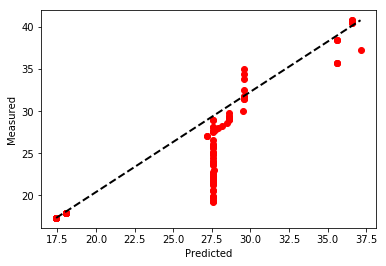

In [177]:
plt.plot(test_y_predictedBMI, y_testBMI, 'ro')
plt.plot([test_y_predictedBMI.min(), test_y_predictedBMI.max()], [y_testBMI.min(), y_testBMI.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [175]:
import numpy as np
def rmse(predictions, targets):
    return np.sqrt((( ((predictions - targets) / targets) * 100 ) ** 2).mean())

In [176]:
acc = 100 - rmse(test_y_predictedBMI, y_testBMI)
acc

84.34228839462847